# 1. Business Problem
## 1.1 Problem Context

Our client is a large community of tech enthusiasts called Kickstarter.

- This community aids people in bringing out creative projects.
- Till now, more than 3 billion dollars have been contributed by the members in fuelling creative projects.
- It works on All or Nothing basis i.e if a project dosen't meet its goal, the project owner gets nothing.

## 1.2 Problem Statement

- Recently, Kickstarter released its public data repository to allow researchers and enthusiasts like us to help them solve a problem.
- The problem is regarding whether a project will get successfully funded or not.
- If we are able to build such a model that predicts whether a project will be funded as per its requirements, it can help the community to determine beforehand, its successful completion.

## 1.3 Business Objectives and Constraints

-  Deliverable: Trained model file.
-  Ouput Probabilities along with the prediction.
-  Model interprtability is very important
-  No latency constraints.

# 2. Machine Learning Problem

## 2.1 Data Overview
For this project:

1. The train dataset and the test datset has 108129 observations and 63465 obervations respectively.
2. The train data consists of sample projects from the May 2009 to May 2015. The test data consists of projects from June 2015 to March 2017.
3. Each observation in the train and test sets refers to a project's description and status.

**Target Variable**
- 'final_status' - whether the project got successfully funded (target variable – 1,0)

**Features of the data:**

Unique characteristics

* project_id - unique id of project
* name - name of the project
* desc - description of project
* goal - the goal (amount) required for the project
* keywords - keywords which describe project

General project specifications 

* disable communication - whether the project authors has disabled communication option with people donating to the project
* country - country of project author
* currency - currency in which goal (amount) is required
* deadline - till this date the goal must be achieved (in unix timeformat)
* backers_count - no. of people who backed the project

Project state information

* state_changed_at - at this time the project status changed. Status could be successful, failed, suspended, cancelled etc. (in unix timeformat)
* created_at - at this time the project was posted on the website(in unix timeformat)
* launched_at - at this time the project went live on the website(in unix timeformat)
* final_status - 	whether the project got successfully funded (target variable – 1,0)

## 2.2 Mapping business problem to ML problem

### 2.2.1 Type of Machine Learning Problem

It is a binary classification problem, where given the above set of features, we need to predict if a given project will be successfully funded or not.

### 2.2.2 Evaluation Metric (KPI)

Since this is binary classification problem, we use the following metrics:
* **Confusion matrix** - For getting a better clarity of the no of correct/incorrect predictions by the model
* **ROC-AUC** - It considers the rank of the output probabilities and intuitively measures the likelihood that model can distinguish between a positive point and a negative point. (**Note:** ROC-AUC is typically used for binary classification only). We will use AUC to select the best model.

# 3. Exploratory Data Analysis (EDA)

Import the libraries

In [2]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Function to perform data standardization 
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import svm

# Evaluation Metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
from sklearn.externals import joblib

import pickle
import gensim

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
np.set_printoptions(precision=3, suppress=True)

## 3.1 Load and read data 

In [4]:
df = pd.read_csv('train.csv')

In [5]:
# Dataframe dimensions
df.shape

(108129, 14)

In [6]:
df.columns

Index(['project_id', 'name', 'desc', 'goal', 'keywords',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'backers_count',
       'final_status'],
      dtype='object')

In [7]:
df.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [8]:
# Column datatypes
df.dtypes

project_id                object
name                      object
desc                      object
goal                     float64
keywords                  object
disable_communication       bool
country                   object
currency                  object
deadline                   int64
state_changed_at           int64
created_at                 int64
launched_at                int64
backers_count              int64
final_status               int64
dtype: object

We observe that the categorical features include 'project_id', 'name', 'desc', 'keywords', 'country; and 'currency'.<br>
'disable_communication' is the only boolean variable here. Let's convert it into numerical type.

In [9]:
def convert(x):
    if x == False:
        return 0
    return 1
df['disable_communication' ] = df['disable_communication' ].map(convert)

In [10]:
df.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,0,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,0,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,0,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,0,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,0,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [11]:
# a check on how many datapoints have 'disable_communication'==1
len(df[df['disable_communication'] == 1])

323

## 3.2 Distribution of numeric features

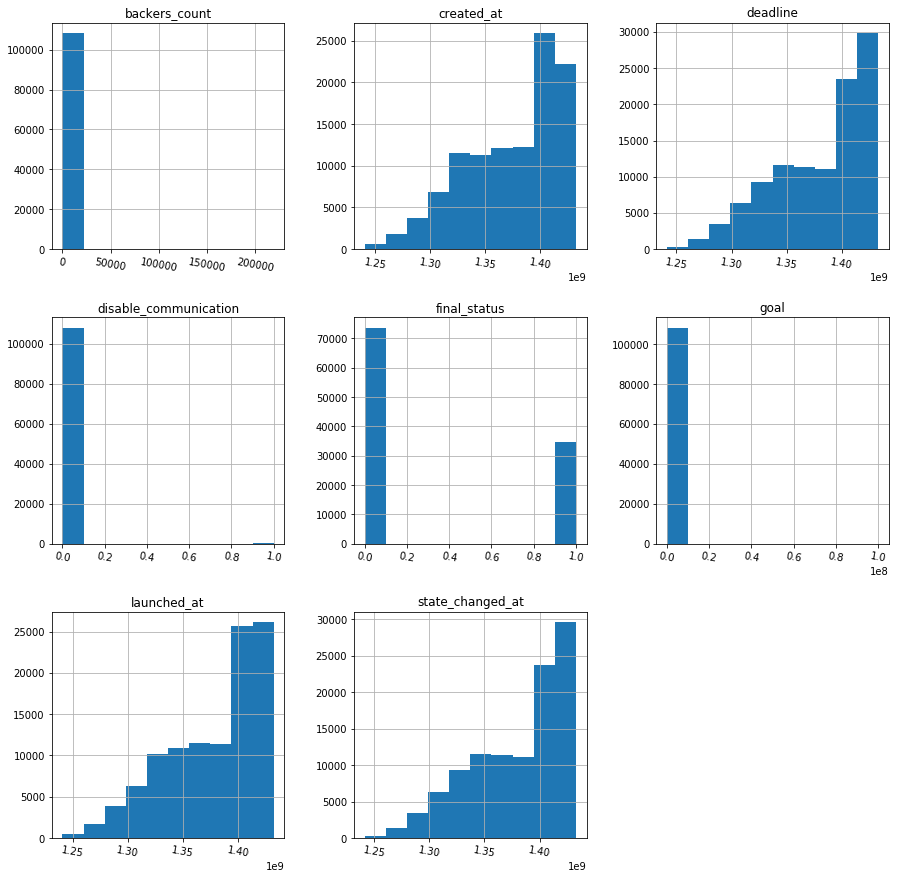

In [12]:
# Plot a histogram grid
df.hist(figsize=(15,15), xrot=-10)

# Clear the text "residue"
plt.show()

**Observations:**
* Very few projects have 'disable_communication' set to 1.
* More than 70K projects could not be funded successfully.

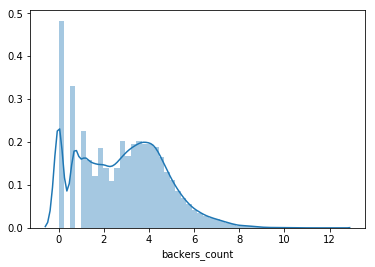

In [13]:
sns.distplot(np.log1p(df['backers_count']))

The 'backers_count' variable becomes normally distributed if we apply logarithmic transformation on it. We can observe that most of the values are near 0 and the rest range in between 1 and 10(roughly).

In [14]:
df.describe()

,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
count,1.081290e+05,108129.000000,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,108129.000000,108129.000000
mean,3.672623e+04,0.002987,1.380248e+09,1.380153e+09,1.374037e+09,1.377299e+09,123.516661,0.319627
std,9.719027e+05,0.054574,4.270222e+07,4.266402e+07,4.272310e+07,4.294421e+07,1176.745162,0.466334
min,1.000000e-02,0.000000,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000,0.000000
25%,2.000000e+03,0.000000,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,2.000000,0.000000
50%,5.000000e+03,0.000000,1.393628e+09,1.393567e+09,1.384445e+09,1.390870e+09,17.000000,0.000000
75%,1.300000e+04,0.000000,1.415719e+09,1.415548e+09,1.409623e+09,1.412807e+09,65.000000,1.000000
max,1.000000e+08,1.000000,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,219382.000000,1.000000


In [15]:
len(df[(df['backers_count']==0)])   # also df[(df['backers_count']==0) & (df['final_status']==0)] ->12832

12832

In [16]:
df['final_status'].value_counts()

0    73568
1    34561
Name: final_status, dtype: int64

## 3.3 Distributions of categorical features

In [17]:
# Summarize categorical features
df.describe(include=['object'])

,project_id,name,desc,keywords,country,currency
count,108129,108126,108120,108129,108129,108129
unique,108129,107831,107364,108129,11,9
top,kkst1193769395,#NAME?,The Decentralized Dance Party was founded on t...,jim-hughes-finding-hope-tour,US,USD
freq,1,8,20,1,92033,92033


**Observations:**
* Some project names might not be specified and hence named as '#NAME?' .<br>
* Also there exists a missing value for 'name' and a few missing values for 'desc' where the project description might not be specified.

Let's check the frequency of each class of these variables

In [18]:
df['project_id'].value_counts()

kkst1193769395    1
kkst346394093     1
kkst849953642     1
kkst487196811     1
kkst607924934     1
kkst566739581     1
kkst218105589     1
kkst1116651460    1
kkst642605966     1
kkst1680556078    1
kkst1693772028    1
kkst344272237     1
kkst934886052     1
kkst1681533868    1
kkst1746741226    1
kkst159587140     1
kkst2123499779    1
kkst1173457965    1
kkst1161966921    1
kkst2064955942    1
kkst1010413306    1
kkst291754153     1
kkst63790091      1
kkst1367156609    1
kkst1826891987    1
kkst1987146641    1
kkst1390944483    1
kkst2021571281    1
kkst924812546     1
kkst263693681     1
                 ..
kkst1741004163    1
kkst1058092158    1
kkst308175063     1
kkst1420157067    1
kkst1867103513    1
kkst196969698     1
kkst1448284119    1
kkst1397529689    1
kkst1659793751    1
kkst928297704     1
kkst1325914433    1
kkst959626324     1
kkst761509497     1
kkst221307125     1
kkst754688938     1
kkst537240796     1
kkst1756949916    1
kkst595475773     1
kkst366538755     1


In [19]:
df['name'].value_counts()

#NAME?                                                                                                                                                                                                                                                                                                                        8
New EP/Music Development                                                                                                                                                                                                                                                                                                      7
Aftermath                                                                                                                                                                                                                                                                                                                     4
Canceled (Canceled)                     

In [20]:
df[df['name']=="New EP/Music Development"]

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
102427,kkst1095666006,New EP/Music Development,Breakout Artist Management has offered to work...,3800.0,new-ep-music-development-14,0,US,USD,1429887960,1429887962,1426863992,1427227367,2,0
102469,kkst62912936,New EP/Music Development,Breakout Artist Management has offered to work...,3000.0,new-ep-music-development-11,0,US,USD,1429901460,1429901464,1426877511,1426878996,54,0
102925,kkst1329754426,New EP/Music Development,Breakout Artist Management has offered to work...,2500.0,new-ep-music-development-15,0,US,USD,1430165460,1430165464,1427227870,1427229307,2,0
105293,kkst996650099,New EP/Music Development,Breakout Artist Management has offered to work...,3250.0,new-ep-music-development-17,0,US,USD,1431458040,1431458042,1427829260,1428444904,3,0
105295,kkst1122006504,New EP/Music Development,Breakout Artist Management has offered to work...,3000.0,new-ep-music-development-18,0,US,USD,1431459300,1431459302,1427830525,1428450090,1,0
105298,kkst387849510,New EP/Music Development,Breakout Artist Management has offered to work...,5000.0,new-ep-music-development-19,0,US,USD,1431460860,1431460861,1427832072,1428450865,1,0
105299,kkst771096078,New EP/Music Development,Breakout Artist Management has offered to work...,6500.0,new-ep-music-development-20,0,US,USD,1431461880,1431461882,1427833134,1428453419,1,0


Some project names are same, however their id's vary since there can be several groups working on the same project topic.

In [21]:
df['country'].value_counts()

US    92033
GB     8758
CA     3736
AU     1880
NL      705
NZ      355
SE      240
DK      196
NO      114
IE      111
DE        1
Name: country, dtype: int64

In [22]:
df['currency'].value_counts()

USD    92033
GBP     8758
CAD     3736
AUD     1880
EUR      817
NZD      355
SEK      240
DKK      196
NOK      114
Name: currency, dtype: int64

**Bar plot for 'currency' feature**

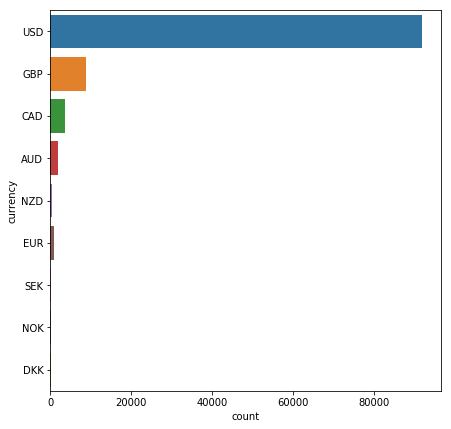

In [23]:
plt.figure(figsize=(7,7))
sns.countplot(y='currency', data=df)

**Observation:**
We can observe that 'NZD', 'EUR', 'SEK', 'NOK', 'DKK' currency types are seldom used and hence we can group them together later.

**Bar plot for 'country' feature**

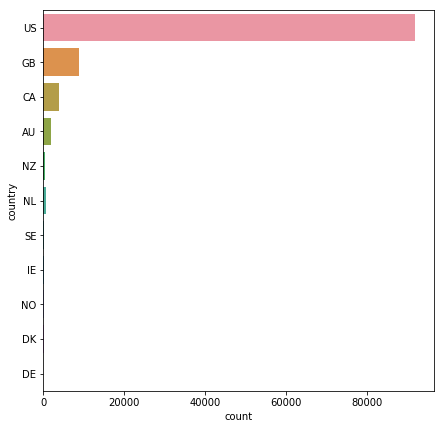

In [24]:
plt.figure(figsize=(7,7))
sns.countplot(y='country', data=df)

**Observation:**
Most of the project authors are from US.<br>
People from some of the countries are very rare as evident from the very short or null bar plots. 

## 3.4 Sparse Classes

Sparse classes are classes in categorical features that have a very small number of observations.

They tend to be problematic when we get to building models.
* In the best case, they don't influence the model much.
* In the worst case, they can cause the model to be overfit.

#### Referring to the bar plot above 
**Observations:** Both 'country' and 'currency' have many sparse classes.

## 3.4 Segmentations

### Bivariate segmentations

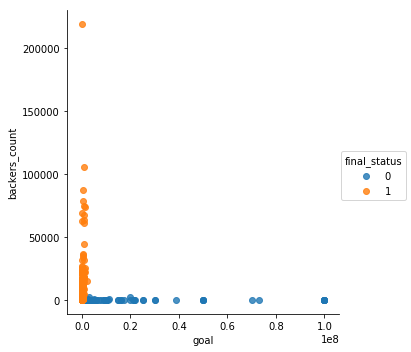

In [25]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='goal', y='backers_count', hue='final_status', data=df, fit_reg=False)

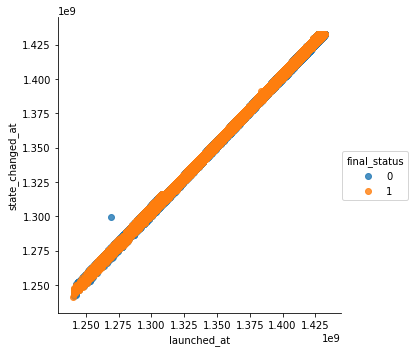

In [26]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='launched_at', y='state_changed_at', hue='final_status', data=df, fit_reg=False)

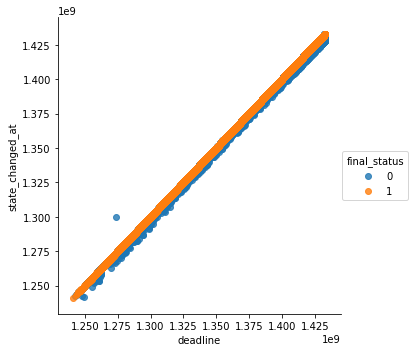

In [27]:
sns.lmplot(x='deadline', y='state_changed_at', hue='final_status', data=df, fit_reg=False)

**Segment by final_status and display means within each class**

In [28]:
df.groupby('final_status').mean()

,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,backers_count
final_status,,,,,,,
0,49372.588911,0.00439,1.383850e+09,1.383710e+09,1.377738e+09,1.380829e+09,29.341534
1,9806.654217,0.00000,1.372582e+09,1.372582e+09,1.366158e+09,1.369786e+09,323.981800


## 3.6 Correlations

* **Correlation** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [29]:
df.corr()

,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
goal,1.000000,-0.000602,0.021468,0.021179,0.020937,0.020859,0.008733,-0.018984
disable_communication,-0.000602,1.000000,0.046417,0.043782,0.048588,0.046166,-0.003294,-0.037517
deadline,0.021468,0.046417,1.000000,0.999930,0.984109,0.999674,0.005281,-0.123052
state_changed_at,0.021179,0.043782,0.999930,1.000000,0.984029,0.999641,0.005501,-0.121628
created_at,0.020937,0.048588,0.984109,0.984029,1.000000,0.984558,0.001053,-0.126394
launched_at,0.020859,0.046166,0.999674,0.999641,0.984558,1.000000,0.005357,-0.119916
backers_count,0.008733,-0.003294,0.005281,0.005501,0.001053,0.005357,1.000000,0.116764
final_status,-0.018984,-0.037517,-0.123052,-0.121628,-0.126394,-0.119916,0.116764,1.000000


**Lets visualize this**

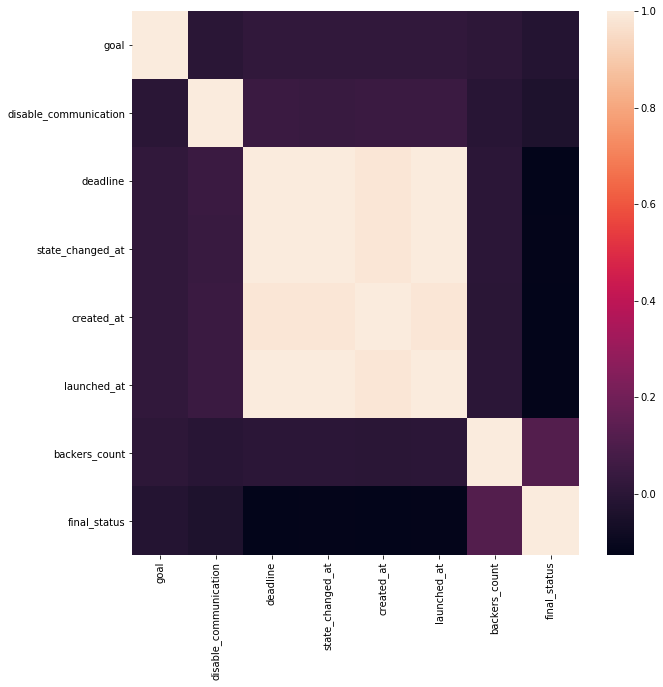

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

**Observation:**
* Most of the features are weakly correlated to each other.
* Features such as 'deadline', 'launched_at', 'created_at', 'state_changed_at' are strongly correlated.

**A fancy visualization of the heatmap**

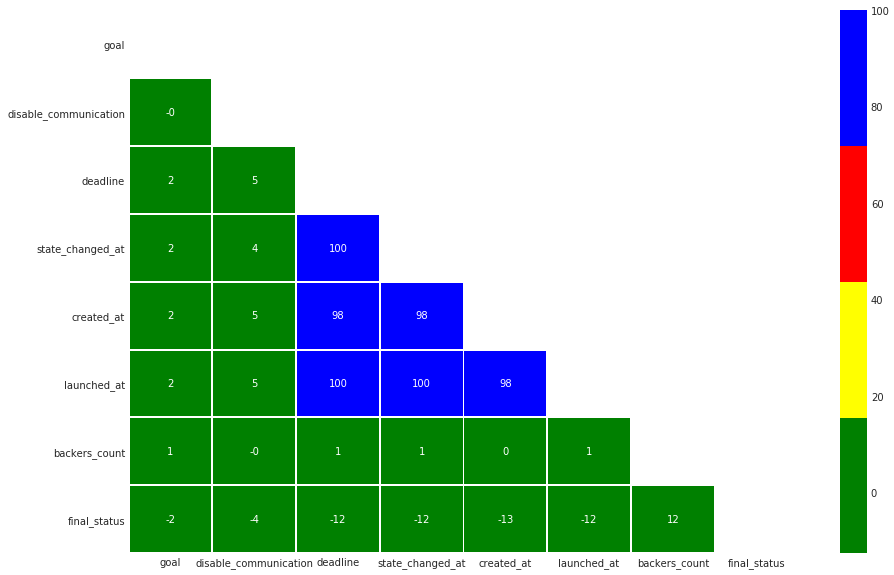

In [31]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

# 4. Data Cleaning
## 4.1 De-duplication and dropping unwanted observations

In [32]:
df.shape

(108129, 14)

In [33]:
# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(108129, 14)


There were no duplicate datapoints in our dataset.

In [34]:
df['disable_communication'].value_counts()

0    107806
1       323
Name: disable_communication, dtype: int64

This feature has unbalanced entires and since it is weakly correlated to out target variable 'final_status', it would be better to drop this.

In [35]:
df = df.drop(labels='disable_communication', axis=1)
df.head(3)

,project_id,name,desc,goal,keywords,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,US,USD,1243027560,1243027818,1242163613,1242164398,0,0


## 4.2 Outliers

* Outliers can cause problems with certain types of models.
* Let's check for such points using box plots.


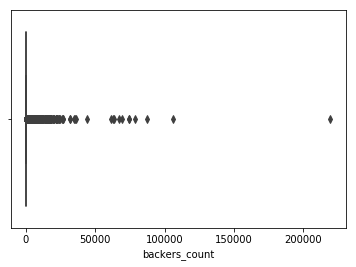

In [36]:
# Checking outliers in backers_count
sns.boxplot(df.backers_count)

* From step 3.2, it can be observed that the max value for 'backers_count' is 219382 while then min is 0.

In [37]:
df.backers_count.sort_values(ascending=False).head(20)

92361    219382
62444    105857
17099     87142
97967     78471
36809     74405
29154     73986
20868     68929
46541     67226
25664     63416
70791     62642
19015     61290
27531     44162
19680     36276
53656     35384
30682     34397
41572     31774
92068     31497
26581     27060
36168     26457
32756     25681
Name: backers_count, dtype: int64

Since the outlier can have an impact on the model at a later stage, it is better to remove it.

In [38]:
## Remove observations with backers_count greater than 120000
df = df[df.backers_count <= 120000]
df.shape

(108128, 13)

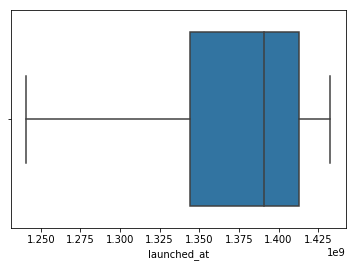

In [39]:
# Checking outliers in backers_count
sns.boxplot(df.launched_at)

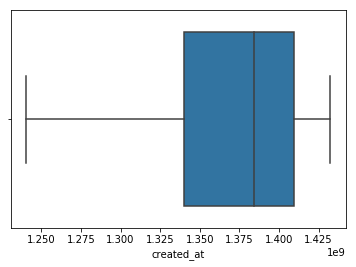

In [40]:
# Checking outliers in backers_count
sns.boxplot(df.created_at)

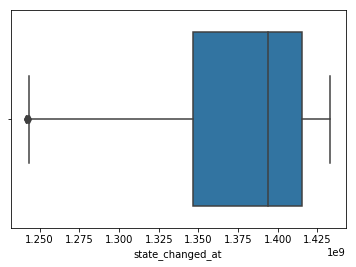

In [41]:
# Checking outliers in backers_count
sns.boxplot(df.state_changed_at)

## 4.3 Missing Data

In [42]:
# Display number of missing values by feature
df.isnull().sum()

project_id          0
name                3
desc                9
goal                0
keywords            0
country             0
currency            0
deadline            0
state_changed_at    0
created_at          0
launched_at         0
backers_count       0
final_status        0
dtype: int64

In [43]:
# Fill missing values in desc with 'Missing'
df['desc'].fillna('Missing', inplace=True)

We noted before that many entries in 'name' column are filled as '#NAME?',br>
So instead of adding a new class as 'Missing', it would be better to replace it by the existing value for unkown names i.e '#NAME?' 

In [44]:
df['name'].fillna('#NAME?', inplace=True)

Check

In [45]:
df.isnull().sum()

project_id          0
name                0
desc                0
goal                0
keywords            0
country             0
currency            0
deadline            0
state_changed_at    0
created_at          0
launched_at         0
backers_count       0
final_status        0
dtype: int64

Now there are no missing values left.

**Save the cleaned dataframe to new file**

In [46]:
df.to_csv('Cleaned.csv', index=None)

In [47]:
df.shape

(108128, 13)

Finally we have a dataframe with vectorized features concatenated with some other required features.

# 5. Feature Engineering

## 5.1 Feature conversions

In [48]:
df['currency'].value_counts()

USD    92032
GBP     8758
CAD     3736
AUD     1880
EUR      817
NZD      355
SEK      240
DKK      196
NOK      114
Name: currency, dtype: int64

** We can bring down the currency types with a common base. Let us consider USD as the base value of currency for all the projects.**

In [49]:
df.currency.replace(['USD'], 1.0, inplace=True)
df.currency.replace(['GBP'], 1.33, inplace=True)
df.currency.replace(['CAD'], 0.76, inplace=True)
df.currency.replace(['AUD'], 0.75, inplace=True)
df.currency.replace(['EUR'], 1.16, inplace=True)
df.currency.replace(['NZD'], 0.7, inplace=True)
df.currency.replace(['SEK'], 0.11, inplace=True)
df.currency.replace(['DKK'], 0.16, inplace=True)
df.currency.replace(['NOK'], 0.12, inplace=True)

**Also, our original dataset has time-based features in unix timestamp format. We will convert here into date format**

In [50]:
df['deadline']=pd.to_datetime(df['deadline'], unit='s').dt.date
df['state_changed_at']=pd.to_datetime(df['state_changed_at'], unit='s').dt.date
df['created_at']=pd.to_datetime(df['created_at'], unit='s').dt.date
df['launched_at']=pd.to_datetime(df['launched_at'], unit='s').dt.date

In [51]:
df.head(3)

,project_id,name,desc,goal,keywords,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,US,1.0,2009-05-03,2009-05-03,2009-04-24,2009-04-24,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,US,1.0,2009-05-15,2009-05-16,2009-04-28,2009-04-29,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,US,1.0,2009-05-22,2009-05-22,2009-05-12,2009-05-12,0,0


## 5.2 Indicator variables

Multiply goal amount and currency to get the total amount in USD.

In [52]:
df['amount'] = df['goal']*df['currency']

In [53]:
df.head(2)

,project_id,name,desc,goal,keywords,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,amount
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,US,1.0,2009-05-03,2009-05-03,2009-04-24,2009-04-24,3,1,20.0
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,US,1.0,2009-05-15,2009-05-16,2009-04-28,2009-04-29,2,0,300.0


Denote the time required by the project to get completed.

In [54]:
df['time_period'] = df.deadline - df.launched_at

The period between the creation of project (starting point) and the project launch can be specified. 

In [55]:
df['creation_till_launch'] = df.launched_at - df.created_at

A 'marker' to denote the time between deadline and state_changed.

In [56]:
df['marker'] = df['deadline'] - df['state_changed_at']

In [57]:
df.head(3)

,project_id,name,desc,goal,keywords,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,amount,time_period,creation_till_launch,marker
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,US,1.0,2009-05-03,2009-05-03,2009-04-24,2009-04-24,3,1,20.0,9 days,0 days,0 days
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,US,1.0,2009-05-15,2009-05-16,2009-04-28,2009-04-29,2,0,300.0,16 days,1 days,-1 days
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,US,1.0,2009-05-22,2009-05-22,2009-05-12,2009-05-12,0,0,30.0,10 days,0 days,0 days


Removing the word 'days'.

In [59]:
df['time_period'] = df['time_period'].map((lambda x: str(x)[:2]))
df['creation_till_launch'] = df['creation_till_launch'].map((lambda y: str(y)[:2]))
df['marker'] = df['marker'].map((lambda w: str(w)[:2]))

In [60]:
df.head(3)

,project_id,name,desc,goal,keywords,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,amount,time_period,creation_till_launch,marker
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,US,1.0,2009-05-03,2009-05-03,2009-04-24,2009-04-24,3,1,20.0,9,0,0
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,US,1.0,2009-05-15,2009-05-16,2009-04-28,2009-04-29,2,0,300.0,16,1,-1
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,US,1.0,2009-05-22,2009-05-22,2009-05-12,2009-05-12,0,0,30.0,10,0,0


Convert it into numeric value.

In [61]:
type(df['marker'][0])

str

In [62]:
df['marker']= pd.to_numeric(df.marker, errors='coerce')
df['time_period']= pd.to_numeric(df.time_period, errors='coerce')
df['creation_till_launch']= pd.to_numeric(df.creation_till_launch, errors='coerce')

In [63]:
print(type(df['marker']))
print(type(df['marker'][0]))

<class 'pandas.core.series.Series'>
<class 'numpy.int64'>


In [64]:
print(sum(df.marker < 0))

93


* A negative value might be due to the possibility that the project status was changed after its deadline. It is obvious here that the project was not a success.

Let us store an indicator 1 for the delayed/suspended projects and a 0 for successful ones.

In [65]:
df['marker'] = (df.marker < 0).astype(int)

In [66]:
df.head()

,project_id,name,desc,goal,keywords,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,amount,time_period,creation_till_launch,marker
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,US,1.0,2009-05-03,2009-05-03,2009-04-24,2009-04-24,3,1,20.0,9,0,0
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,US,1.0,2009-05-15,2009-05-16,2009-04-28,2009-04-29,2,0,300.0,16,1,1
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,US,1.0,2009-05-22,2009-05-22,2009-05-12,2009-05-12,0,0,30.0,10,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,US,1.0,2009-05-29,2009-05-29,2009-04-29,2009-04-29,18,1,500.0,30,0,0
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,US,1.0,2009-05-31,2009-05-31,2009-05-01,2009-05-01,1,0,2000.0,30,0,0


In [67]:
df.shape

(108128, 17)

## 5.3 Remove unused or redundant features

Since we have deduced the amount in terms of USD for every datapoint from 'goal' and 'currency', we can drop the latter.

In [68]:
df = df.drop(['goal', 'currency', 'country'], axis=1)

Similarly, project_id ,name, desc, and keywords can be discarded since it wasn't of any use till now.

In [69]:
df = df.drop(['name', 'desc', 'keywords', 'project_id'], axis=1)

We can also consider dropping either all from 'deadline', 'state_changed_at', 'launched_at', 'created_at', or some of them.

In [70]:
df = df.drop(['state_changed_at', 'launched_at', 'deadline', 'created_at'], axis=1)

In [71]:
df.isnull().values.any()

False

In [72]:
df.head()

,backers_count,final_status,amount,time_period,creation_till_launch,marker
0,3,1,20.0,9,0,0
1,2,0,300.0,16,1,1
2,0,0,30.0,10,0,0
3,18,1,500.0,30,0,0
4,1,0,2000.0,30,0,0


In [73]:
df.shape

(108128, 6)

In [74]:
# Save analytical base table
df.to_csv('Analytical_base_table.csv', index=None)

# 6. Machine Learning Models
## 6.1 Data Preparation

In [75]:
print(df.shape)

(108128, 6)


### 6.1.1 Train test split

In [76]:
# Create separate object for target variable
y = df.final_status

# Create separate object for input features
X = df.drop('final_status', axis=1)

In [77]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=df.final_status)


In [78]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(86502, 5) (21626, 5) (86502,) (21626,)


### 6.1.2 Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [79]:
train_mean = X_train.mean()
train_std = X_train.std()

In [80]:
train_mean.shape

(5,)

In [81]:
X_train.mean().shape

(5,)

In [82]:
# Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [83]:
# Check for mean and std dev.
X_train.describe()

,backers_count,amount,time_period,creation_till_launch,marker
count,8.650200e+04,8.650200e+04,8.650200e+04,8.650200e+04,8.650200e+04
mean,-3.330265e-16,1.770234e-16,1.841251e-15,-7.783613e-16,4.788535e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.275617e-01,-3.922709e-02,-2.560328e+00,-8.511537e-01,-3.080330e-02
25%,-1.254395e-01,-3.700678e-02,-3.223505e-01,-7.069717e-01,-3.080330e-02
50%,-1.095226e-01,-3.366115e-02,-3.223505e-01,-3.705470e-01,-3.080330e-02
75%,-5.858871e-02,-2.442031e-02,2.178509e-01,3.023024e-01,-3.080330e-02
max,1.121997e+02,1.112962e+02,4.462291e+00,3.906853e+00,3.246368e+01


In [84]:
# standardize test data set
X_test = (X_test - train_mean) / train_std

In [85]:
X_test.describe()

,backers_count,amount,time_period,creation_till_launch,marker
count,21626.000000,21626.000000,21626.000000,21626.000000,21626.000000
mean,0.006765,-0.000540,0.003122,-0.014746,-0.014275
std,1.137037,1.009044,1.002017,0.982368,0.732685
min,-0.127562,-0.039228,-2.560328,-0.851154,-0.030803
25%,-0.125439,-0.037017,-0.322351,-0.706972,-0.030803
50%,-0.109523,-0.033661,-0.322351,-0.370547,-0.030803
75%,-0.059650,-0.025311,0.217851,0.302302,-0.030803
max,83.139824,111.296173,4.462291,3.906853,32.463676


## 6.2 Model-1 Logistic Regression

In [86]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [87]:
model.best_estimator_

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [89]:
## Predict Test set results
y_pred = model.predict(X_test)

In [90]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [91]:
y_pred_proba[:10]

array([0.173, 0.155, 0.003, 0.025, 0.931, 0.201, 0.143, 0.096, 0.179,
       0.104])

In [92]:
i=323  ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 323, actual class = 0, precited class = 0, predicted probability = 0.2981426018417004


In [93]:
confusion_matrix(y_test, y_pred).T

array([[13957,  3079],
       [  757,  3833]], dtype=int64)

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

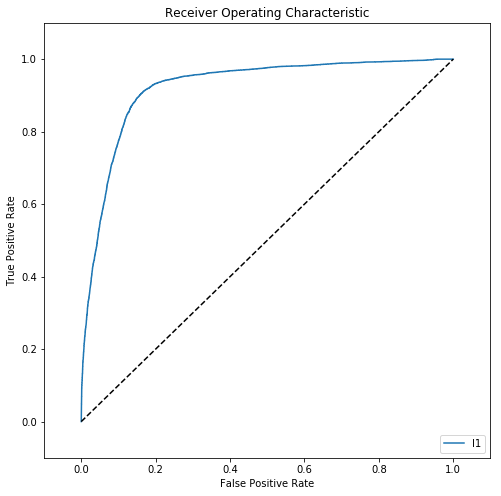

In [95]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [96]:
# Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

0.752846564108264


In [97]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.9223190717126923


In [98]:
## Building the model again with the best hyperparameters
model = LogisticRegression(C=10000, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
amount
backers_count
time_period
creation_till_launch
marker


## 6.2 Model-2 Random Forest Classifier

In [172]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 4, 5, 7, 8], 'min_samples_leaf': [1, 2, 3, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=35, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=35, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 4, 5, 7, 8], 'min_samples_leaf': [1, 2, 3, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [173]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [174]:
y_train_pred = model.predict(X_train)

In [175]:
y_pred = model.predict(X_test)

In [176]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [177]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.185, 0.001, 0.009, 0.051, 0.968, 0.088, 0.002, 0.006, 0.002,
       0.001])

In [178]:
confusion_matrix(y_test, y_pred).T

array([[13101,  1111],
       [ 1613,  5801]], dtype=int64)

In [179]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

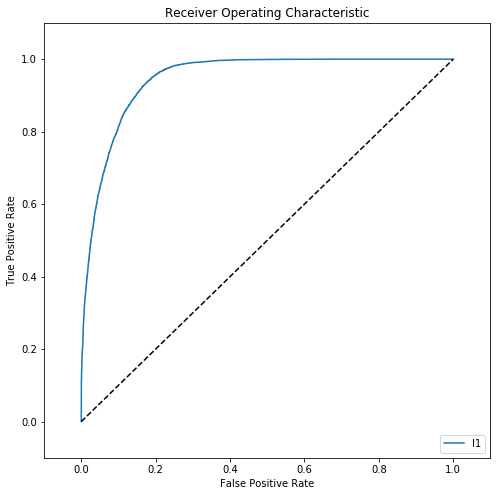

In [180]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [181]:
# Calculate AUC for Train set
roc_auc_score(y_train, y_train_pred)

0.9213969455488724

In [182]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.9468554902832524


#### Feature Importance

In [183]:
## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=500, min_samples_split=4, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [184]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
backers_count
amount
creation_till_launch
time_period
marker


## 6.2 Model-3 XGBoost

In [185]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=30, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [186]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [187]:
y_train_pred = model.predict(X_train)

In [188]:
y_pred = model.predict(X_test)

In [189]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [190]:
y_pred_proba[:10]

array([0.14 , 0.001, 0.017, 0.045, 1.   , 0.056, 0.003, 0.002, 0.   ,
       0.   ], dtype=float32)

In [191]:
confusion_matrix(y_test, y_pred).T

array([[13056,  1025],
       [ 1658,  5887]], dtype=int64)

In [192]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

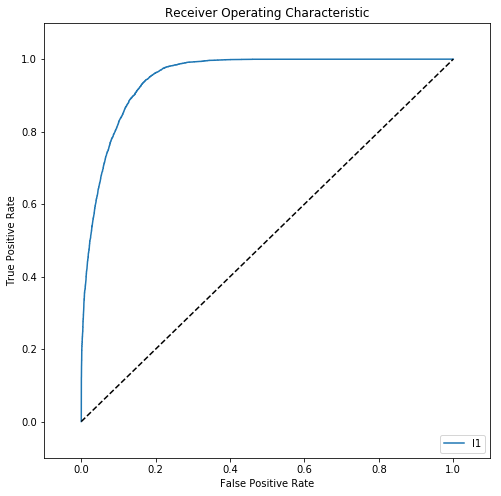

In [193]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [194]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.8725779356189326

In [195]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.9502850098042177


#### Feature Importance

In [196]:
model = XGBClassifier(max_depth=2,learning_rate=0.1,n_estimators=400, reg_lambda=0.01)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [197]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

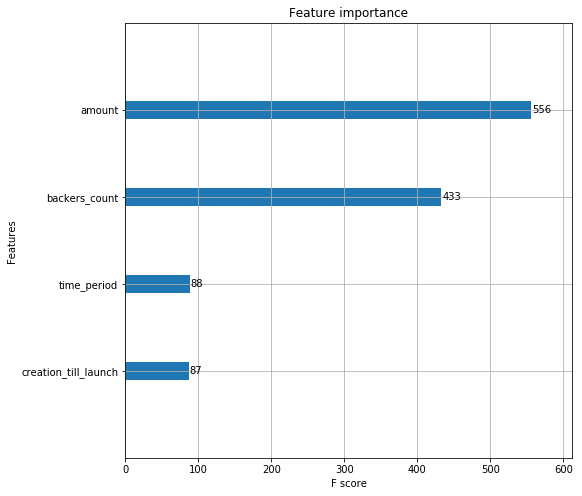

In [198]:
my_plot_importance(model, (8,8))

## 6.2 Model-4 KNN

In [127]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
cv_scores = []


for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 9.


In [128]:
MSE.index(min(MSE))

4

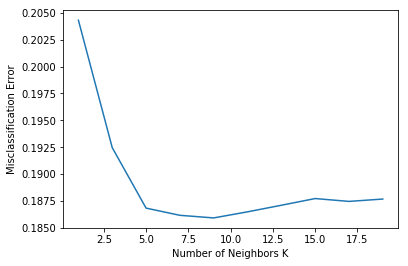

In [129]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [130]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [131]:
y_pred = classifier.predict(X_test)

In [132]:
y_train_pred = classifier.predict(X_train)

In [133]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
acc

81.55923425506334

In [134]:
cnf=confusion_matrix(y_test,y_pred).T
cnf

array([[12595,  1869],
       [ 2119,  5043]], dtype=int64)

In [135]:
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [136]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.444, 0.   , 0.111, 0.111, 0.556, 0.222, 0.   , 0.   , 0.   ,
       0.   ])

In [137]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

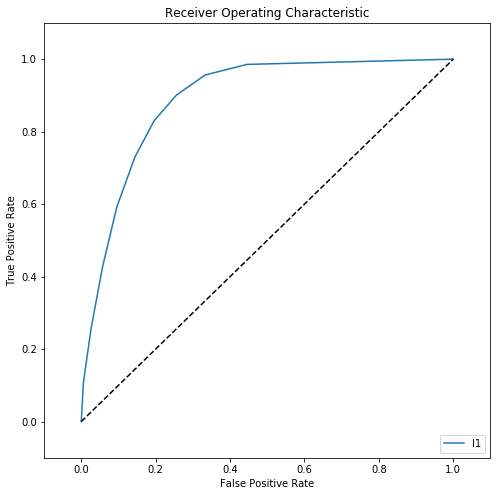

In [138]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [139]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.8343652757836718

In [140]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.8898861390433777


## 6.2 Model-5 Descision Trees

In [148]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=45, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=45, n_jobs=-1,
          param_distributions={'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_depth': [2, 3, 4, 5, 6, 7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [149]:
model.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [150]:
y_train_pred = model.predict(X_train)

In [151]:
y_pred = model.predict(X_test)

In [152]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [153]:
y_pred_proba[:10]

array([0.174, 0.   , 0.013, 0.013, 0.993, 0.027, 0.002, 0.002, 0.   ,
       0.   ])

In [154]:
confusion_matrix(y_test, y_pred).T

array([[12951,  1003],
       [ 1763,  5909]], dtype=int64)

In [155]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

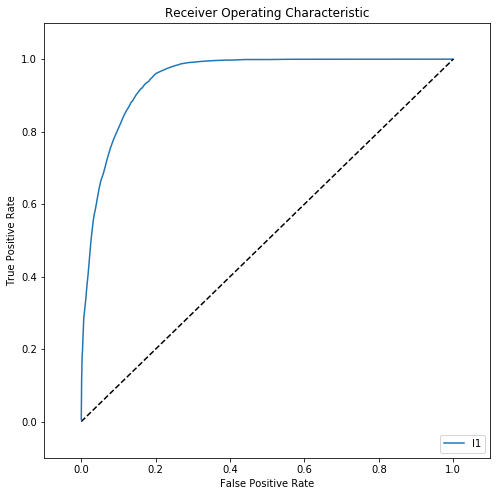

In [156]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [157]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.8712983597239685

In [158]:
print(auc(fpr, tpr))

0.946676543055178


#### Feature Importance

In [159]:
## Building the model again with the best hyperparameters
model = DecisionTreeClassifier(min_samples_split=7, min_samples_leaf=4, max_depth=7)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [160]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
backers_count
amount
time_period
creation_till_launch
marker


## 6.2 Model-6 SVC

In [161]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [162]:
svClassifier=SVC(kernel='rbf',probability=True)
svClassifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [163]:
svc_param_selection(X_train,y_train,5
                   )

{'C': 10, 'gamma': 1}

In [164]:
# Building the model again with the best hyperparameters
model = SVC(C=10, gamma=1)
model.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [165]:
# Predict Train results
y_train_pred = model.predict(X_train)

In [166]:
# Predict Test results
y_pred = model.predict(X_test)

In [167]:
confusion_matrix(y_test, y_pred).T

array([[13408,  2392],
       [ 1306,  4520]], dtype=int64)

In [168]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

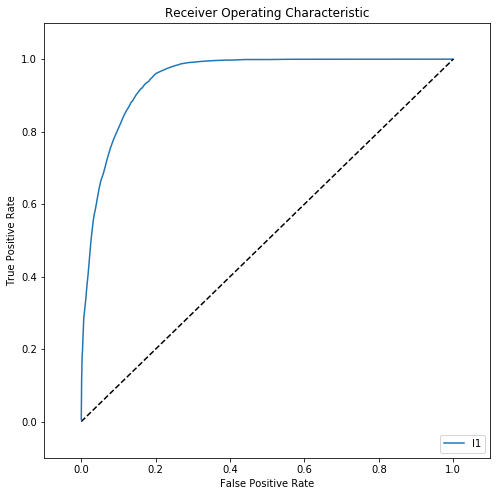

In [169]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [170]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.7852663867425701

In [171]:
print(auc(fpr, tpr))

0.946676543055178


## Model comparison

![title](img1.PNG)

ROC curve is a plot of the true positive rate against the false positive rate for the different possible points.<br>
AUC is literally just the percentage of this box that is under this curve.<br>
A very poor classifier has an AUC of around 0.5, and an extremely good classifier has an AUC of close to 1.,br>
On comparing the above built models, the Random Forest Classifier gives better AUC values for both train and test.<br>
If we look at Xgboost classifier, its test time predictions are a little better(0.95) than the test time predictions of Random forest(0.94). However, Xgboost has a greater margin between its train and test AUC values as compared to Random Forest.<br>
Hence we prefer Random Forest here.

##  Save the winning model to disk

In [199]:
win_model = RandomForestClassifier(n_estimators=500, min_samples_split=4, min_samples_leaf=4)
win_model.fit(X_train, y_train)
joblib.dump(win_model, 'FSP_model.pkl') 

['FSP_model.pkl']